## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### We can see there 768 instances in the dataset which is very small for ml

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


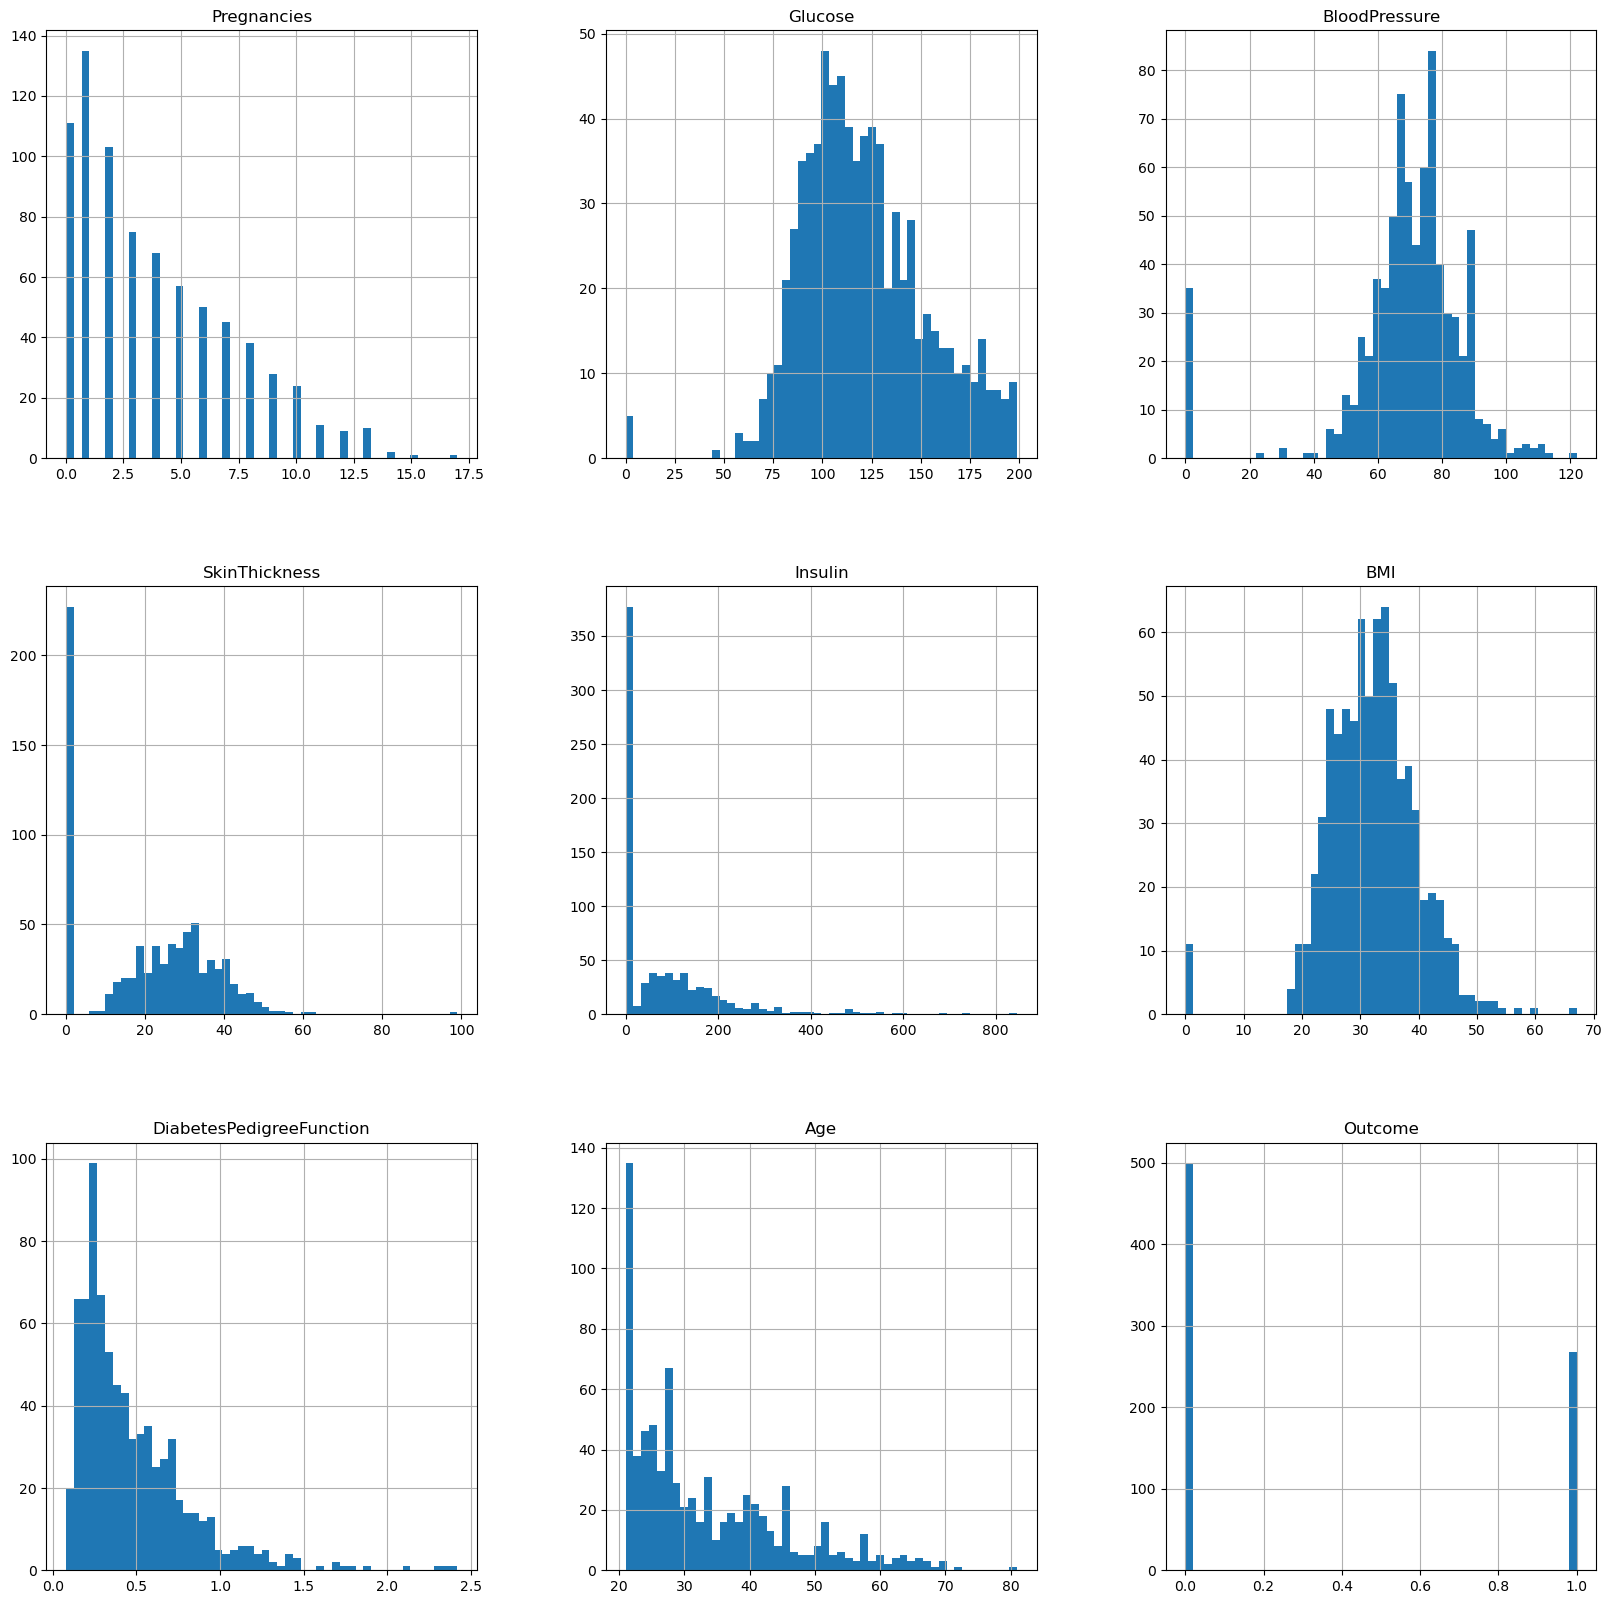

In [5]:

df.hist(bins=50,figsize=(20,20))
plt.show()

In [6]:
df.drop_duplicates(inplace=True)

## Creatin a dataset

In [7]:
from sklearn.model_selection import train_test_split
original_train_df , test_df = train_test_split(df,test_size=0.2)
train_df = original_train_df.copy()

### no major correlation between columns

## Handling missing data

In [8]:
names = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
for name in names:
    train_df[name].replace(0,np.nan,inplace=True)

In [9]:
train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
607,1,92.0,62.0,25.0,41.0,19.5,0.482,25,0
86,13,106.0,72.0,54.0,NaN,36.6,0.178,45,0
59,0,105.0,64.0,41.0,142.0,41.5,0.173,22,0
241,4,91.0,70.0,32.0,88.0,33.1,0.446,22,0
567,6,92.0,62.0,32.0,126.0,32.0,0.085,46,0


In [10]:
glucose_median = train_df["Glucose"].median()
blood_pressure_median = train_df["BloodPressure"].median()
skin_thickness_median  = train_df["SkinThickness"].median()
insulin_median = train_df["Insulin"].median()
bmi_median = train_df["BMI"].median()
age_median = train_df["Age"].median()
dpf_median = train_df["DiabetesPedigreeFunction"].median()
print(glucose_median)
print(blood_pressure_median)
print(skin_thickness_median)
print(insulin_median)
print(bmi_median)
print(age_median)
print(dpf_median)


117.0
72.0
29.0
130.0
32.0
30.0
0.377


In [11]:
train_df["Glucose"].fillna(glucose_median,inplace=True)
train_df["BloodPressure"].fillna(blood_pressure_median,inplace=True)
train_df["SkinThickness"].fillna(skin_thickness_median,inplace=True)
train_df["Insulin"].fillna(insulin_median,inplace=True)
train_df["BMI"].fillna(bmi_median,inplace=True)
train_df["Age"].fillna(age_median,inplace=True)
train_df["DiabetesPedigreeFunction"].fillna(dpf_median,inplace=True)

## Encdoing Categorical Attributes

In [12]:
temp_df = train_df.copy()
fitness_value = ["bad","moderate","good","very good"]
temp_df["fitness"] = np.random.choice(fitness_value,temp_df.shape[0])

temp_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,fitness
607,1,92.0,62.0,25.0,41.0,19.5,0.482,25,0,very good
86,13,106.0,72.0,54.0,130.0,36.6,0.178,45,0,moderate
59,0,105.0,64.0,41.0,142.0,41.5,0.173,22,0,good
241,4,91.0,70.0,32.0,88.0,33.1,0.446,22,0,bad
567,6,92.0,62.0,32.0,126.0,32.0,0.085,46,0,moderate


### Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
fitness_encoded = encoder.fit_transform(temp_df["fitness"])
for id_,class_ in enumerate(encoder.classes_):
    print(f"class id {id_} has label {class_}")

print()
print(f"Encoded fitness value for first 10 entries: {fitness_encoded[:10]}")

class id 0 has label bad
class id 1 has label good
class id 2 has label moderate
class id 3 has label very good

Encoded fitness value for first 10 entries: [3 2 1 0 2 0 0 2 1 1]


## Rescaling or Standardizing attributes

In [14]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()

temp1_df = train_df.copy()
column_names = temp1_df.columns.tolist()

temp1_df[column_names] = mm_scaler.fit_transform(temp1_df[column_names])
temp1_df.sort_index(inplace=True)
temp1_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.428571,0.670968,0.525,0.304348,0.139423,0.314928,0.234415,0.591837,1.0
1,0.071429,0.264516,0.450,0.239130,0.139423,0.171779,0.116567,0.204082,0.0
2,0.571429,0.896774,0.425,0.239130,0.139423,0.104294,0.253629,0.224490,1.0
3,0.071429,0.290323,0.450,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.125,0.304348,0.185096,0.509202,0.943638,0.244898,1.0


In [15]:
from sklearn.preprocessing import StandardScaler

Standard_scaler = StandardScaler()
temp2_df = train_df.copy()
temp2_df[column_names] = Standard_scaler.fit_transform(temp2_df[column_names])
temp2_df.sort_index(inplace=True)
temp2_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.635460,0.855887,-0.046373,0.670744,-0.166799,0.172026,0.529400,1.398751,1.372089
1,-0.876836,-1.192586,-0.544446,-0.010353,-0.166799,-0.839421,-0.355548,-0.233032,-0.728816
2,1.240378,1.993927,-0.710471,-0.010353,-0.166799,-1.316247,0.673685,-0.147149,1.372089
3,-0.876836,-1.062524,-0.544446,-0.691450,-0.602708,-0.622683,-0.945513,-1.091865,-0.728816
4,-1.179295,0.498217,-2.702764,0.670744,0.293328,1.544705,5.855116,-0.061265,1.372089


When to use which:
Normalization is ideal when your data does not follow a normal distribution or when you're dealing with algorithms that are distance-sensitive and sensitive to feature scale but not feature distribution (e.g., KNN, Neural Networks).

Standardization is preferred when the data follows a normal distribution, or you're working with algorithms that assume normality or rely on distances or covariance (e.g., Linear Regression, PCA, SVM).

# Feature Engineering

#### Categorcial Features

In [16]:
data = [
    {'price':85000 ,'rooms':4,'neighbourhood':'Queen Anne'},
    {'price':70000 ,'rooms':3,'neighbourhood':'Fremont'},
    {'price':65000 ,'rooms':3,'neighbourhood':'Wallingford'},
    {'price':60000 ,'rooms':2,'neighbourhood':'Fremont'}
]

In [17]:
{'Queen Anne':1,"Fremont":2,"Wallingford":3}

{'Queen Anne': 1, 'Fremont': 2, 'Wallingford': 3}

In [18]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False,dtype=int)
vec.fit_transform(data)

array([[    0,     1,     0, 85000,     4],
       [    1,     0,     0, 70000,     3],
       [    0,     0,     1, 65000,     3],
       [    1,     0,     0, 60000,     2]])

In [19]:
vec.get_feature_names_out()

array(['neighbourhood=Fremont', 'neighbourhood=Queen Anne',
       'neighbourhood=Wallingford', 'price', 'rooms'], dtype=object)

## Text Features

In [20]:
sample = ["problem of evil",
          "evil queen",
          "horizon problem"]

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()

X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [22]:
pd.DataFrame(X.toarray(),columns=vec.get_feature_names_out())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


## Feature Pipelines